In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

In [2]:
data = pd.read_csv('Train.csv')

data.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [3]:
data.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


<AxesSubplot:>

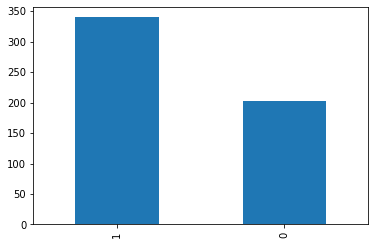

In [5]:
data['IsUnderRisk'].value_counts().plot(kind = 'bar')

In [6]:
train = data.sample(frac = 0.8)
valid = data.drop(train.index)

train.head(3)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
536,6,74.338,8,7,6,4,0,0
236,3,67.946,8,7,13,8,1,1
7,23,74.132,11,15,5,8,0,1


In [7]:
X_train, y_train = train.drop('IsUnderRisk', axis = 1), train.IsUnderRisk
X_valid, y_valid = valid.drop('IsUnderRisk', axis = 1), valid.IsUnderRisk

X_train.head(3)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
536,6,74.338,8,7,6,4,0
236,3,67.946,8,7,13,8,1
7,23,74.132,11,15,5,8,0


In [8]:
y_train.head(3)

536    0
236    1
7      1
Name: IsUnderRisk, dtype: int64

## DecisionTreeCLassifier

In [9]:
model_dt = DecisionTreeClassifier(random_state = 11)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [10]:
preds_dt = model_dt.predict(X_valid)

# Accuracy
acc_dt = metrics.accuracy_score(y_valid, preds_dt)
print(f'Accuracy: {acc_dt}')

# Confusion_Matrix
conf_dt = metrics.confusion_matrix(y_valid, preds_dt)
print('\nConfusion Matrix')
conf_dt

Accuracy: 0.8715596330275229

Confusion Matrix


array([[39,  6],
       [ 8, 56]], dtype=int64)

## LogisticRegression

In [11]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [12]:
preds_lr = model_lr.predict(X_valid)

# Accuracy
acc_lr = metrics.accuracy_score(y_valid, preds_lr)
print(f'Accuracy: {acc_lr}')

# Confusion_Matrix
cm_lr = metrics.confusion_matrix(y_valid, preds_lr)
print('\nConfusion Matrix')
cm_lr

Accuracy: 0.8532110091743119

Confusion Matrix


array([[40,  5],
       [11, 53]], dtype=int64)

## KNeighborsClassifier

In [13]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
preds_knn = model_knn.predict(X_valid)

# Accuracy
acc_knn = metrics.accuracy_score(y_valid, preds_knn)
print(f'Accuracy: {acc_knn}')

# Confusion Matrix
cm_knn = metrics.confusion_matrix(y_valid, preds_knn)
print('\nConfusion Matrix')

cm_knn

Accuracy: 0.8073394495412844

Confusion Matrix


array([[32, 13],
       [ 8, 56]], dtype=int64)

## SupportVectorClassifier

In [15]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [16]:
preds_svc = model_svc.predict(X_valid)

# Accuracy
acc_svc = metrics.accuracy_score(y_valid, preds_svc)
print(f'Accuracy: {acc_svc}')

# Confusion Matrix
cm_svc = metrics.confusion_matrix(y_valid, preds_svc)
print('\nConfusion Matrix')
cm_svc

Accuracy: 0.7981651376146789

Confusion Matrix


array([[31, 14],
       [ 8, 56]], dtype=int64)

### Using scaled data

In [17]:
# Scaler Function
scaler = StandardScaler()

In [18]:
# Scaling training and validation sets
# Using train set to fit the scaler
# And scale the set
X_train_s = scaler.fit_transform(X_train)

X_train_s

array([[-0.91468796,  1.71390893, -0.10484203, ..., -0.34192558,
        -0.80379115, -0.90260835],
       [-1.11712273,  1.45559868, -0.10484203, ...,  1.85885815,
         1.41110003,  0.58686702],
       [ 0.23244238,  1.70558416,  0.81129436, ..., -0.65632326,
         1.41110003, -0.90260835],
       ...,
       [ 0.77226842, -0.69158501,  1.11667315, ..., -0.02752791,
         1.41110003,  0.58686702],
       [ 0.77226842,  0.00369467, -0.10484203, ..., -0.97072094,
        -0.25006836,  0.58686702],
       [-1.04964447, -0.55988397,  0.50591556, ..., -0.97072094,
        -1.35751395,  0.58686702]])

In [19]:
# Convert to dataframe
X_train_s = pd.DataFrame(X_train_s, columns = X_train.columns)
X_train_s.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,-0.914688,1.713909,-0.104842,-0.096936,-0.341926,-0.803791,-0.902608
1,-1.117123,1.455599,-0.104842,-0.096936,1.858858,1.411100,0.586867
2,0.232442,1.705584,0.811294,2.208289,-0.656323,1.411100,-0.902608
3,-0.914688,0.236869,-0.104842,-0.673243,-0.970721,-0.250068,0.586867
4,-0.982166,1.664324,0.505916,0.191217,-0.970721,1.411100,-0.902608


In [20]:
# X_train_s = X_train_s.reindex(X_train.index)
# X_train_s.head()

In [21]:
X_train_s.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

In [22]:
# Scaling validation set
X_valid_s = pd.DataFrame(scaler.transform(X_valid), columns = X_valid.columns)
# X_valid_s = X_valid_s.reindex(X_valid.index)

X_valid_s.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,-1.252079,-1.038154,0.505916,0.767523,1.544460,-1.357514,0.586867
1,-1.049644,1.761433,-0.104842,1.343830,-0.970721,-0.803791,-0.902608
2,-1.319557,0.104885,0.811294,0.767523,2.173256,-1.357514,0.586867
3,-0.037471,-0.904796,-1.631736,-0.096936,-0.656323,0.857377,-0.902608
4,-1.184601,-0.398440,-0.410221,-1.249549,0.286870,-0.250068,0.586867


In [23]:
X_valid_s.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

In [24]:
def train_evaluate(X_train, y_train, X_valid, y_valid, model):
    
    if model == 'decisiontree':
        model = DecisionTreeClassifier(random_state = 11)
        model.fit(X_train, y_train)
        
        preds = model.predict(X_valid)
        
        print('DecisionTree')
        print('----------------------')
        # Accuracy
        acc = metrics.accuracy_score(y_valid, preds)
        print('Accuracy: ', acc)
        print('\n.................................')
        print('Confusion Matrix')
        cm = metrics.confusion_matrix(y_valid, preds)
        print(cm)
        
    elif model == 'logisticregression':
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        preds = model.predict(X_valid)
        
        print('LogisticRegression')
        print('----------------------')
        # Accuracy
        acc = metrics.accuracy_score(y_valid, preds)
        print('Accuracy: ', acc)
        print('\n.................................')
        print('Confusion Matrix')
        cm = metrics.confusion_matrix(y_valid, preds)
        print(cm)
        
    elif model == 'knn':
        model = KNeighborsClassifier()        
        model.fit(X_train, y_train)
        
        preds = model.predict(X_valid)
        
        print('KNeighborsClassifier')
        print('----------------------')
        # Accuracy
        acc = metrics.accuracy_score(y_valid, preds)
        print('Accuracy: ', acc)
        print('\n.................................')
        print('Confusion Matrix')
        cm = metrics.confusion_matrix(y_valid, preds)
        print(cm)
        
    elif model == 'svc':
        model = SVC()
        model.fit(X_train, y_train)
        
        preds = model.predict(X_valid)
        
        print('SupportVector Classifier')
        print('----------------------')
        # Accuracy
        acc = metrics.accuracy_score(y_valid, preds)
        print('Accuracy: ', acc)
        print('\n.................................')
        print('Confusion Matrix')
        cm = metrics.confusion_matrix(y_valid, preds)
        print(cm)

In [25]:
train_evaluate(X_train_s, y_train, X_valid_s, y_valid, 'decisiontree')

DecisionTree
----------------------
Accuracy:  0.8715596330275229

.................................
Confusion Matrix
[[39  6]
 [ 8 56]]


In [26]:
train_evaluate(X_train_s, y_train, X_valid_s, y_valid, 'logisticregression')

LogisticRegression
----------------------
Accuracy:  0.8440366972477065

.................................
Confusion Matrix
[[39  6]
 [11 53]]


In [27]:
train_evaluate(X_train_s, y_train, X_valid_s, y_valid, 'knn')

KNeighborsClassifier
----------------------
Accuracy:  0.8256880733944955

.................................
Confusion Matrix
[[36  9]
 [10 54]]


In [28]:
train_evaluate(X_train_s, y_train, X_valid_s, y_valid, 'svc')

SupportVector Classifier
----------------------
Accuracy:  0.8623853211009175

.................................
Confusion Matrix
[[40  5]
 [10 54]]
